# Download data

In [2]:
import requests
from io import StringIO
import pandas as pd
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=T&apikey=UFVJFB19LYO2F2DL&datatype=csv&outputsize=full'
urlData = requests.get(url).content
rawData = pd.read_csv(StringIO(urlData.decode('utf-8')), parse_dates=["timestamp"], index_col='timestamp')

print(rawData)


             open    high     low  close    volume
timestamp                                         
2021-10-27  25.39  25.475  25.040  25.06  39993988
2021-10-26  25.63  25.700  25.350  25.37  36395574
2021-10-25  25.43  25.660  25.320  25.64  49626060
2021-10-22  25.76  25.800  25.465  25.49  37129283
2021-10-21  26.12  26.290  25.600  25.76  55827824
...           ...     ...     ...    ...       ...
1999-11-05  51.00  51.440  50.500  51.25   4816700
1999-11-04  50.31  50.810  49.500  49.81   5442700
1999-11-03  50.75  51.130  49.630  50.56   7647100
1999-11-02  53.00  53.000  50.500  50.75   7057100
1999-11-01  52.00  53.000  51.310  53.00   5985500

[5534 rows x 5 columns]


In [9]:
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=VZ&apikey=UFVJFB19LYO2F2DL&datatype=csv&outputsize=full'
urlData = requests.get(url).content
rawDataVZ = pd.read_csv(StringIO(urlData.decode('utf-8')), parse_dates=["timestamp"], index_col='timestamp')

print(rawDataVZ)

             open   high    low  close    volume
timestamp                                       
2021-10-28  52.75  53.15  52.62  52.80  18340335
2021-10-27  53.17  53.20  52.47  52.63  15007369
2021-10-26  52.70  53.17  52.56  53.08  15185173
2021-10-25  52.97  53.10  52.46  52.58  15987353
2021-10-22  53.42  53.42  52.88  52.93  16074022
...           ...    ...    ...    ...       ...
1999-11-05  62.81  63.50  62.31  62.31   4171900
1999-11-04  63.56  63.69  62.63  62.63   2207800
1999-11-03  62.75  63.75  62.56  63.50   2965100
1999-11-02  64.31  64.87  63.00  63.00   2668800
1999-11-01  65.19  65.31  64.44  64.44   4260300

[5535 rows x 5 columns]


In [3]:
print(rawData.shape)
print(rawData.head())
#filter on dates required


(5534, 5)
             open    high     low  close    volume
timestamp                                         
2021-10-27  25.39  25.475  25.040  25.06  39993988
2021-10-26  25.63  25.700  25.350  25.37  36395574
2021-10-25  25.43  25.660  25.320  25.64  49626060
2021-10-22  25.76  25.800  25.465  25.49  37129283
2021-10-21  26.12  26.290  25.600  25.76  55827824


In [11]:
# get valid date ranges
dataT = rawData.loc[(rawData.index >= '2019-01-01 00:00:00') & (rawData.index <= '2021-01-06 00:00:00') ]
dataVZ = rawDataVZ.loc[(rawDataVZ.index >= '2019-01-01 00:00:00') & (rawDataVZ.index <= '2021-01-06 00:00:00') ]

<AxesSubplot:xlabel='timestamp'>

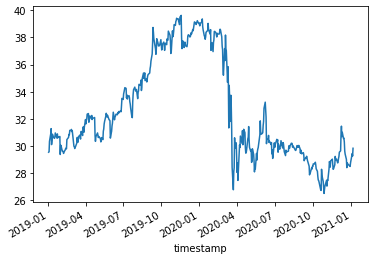

In [5]:
dataT['close'].plot()

<AxesSubplot:xlabel='timestamp'>

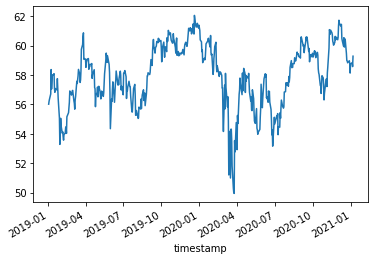

In [12]:
dataVZ['close'].plot()

In [22]:
# setup datatimeindex before we can use seasonal decompose
# dti = pd.DatetimeIndex(dataT.index)
# dataT.set_index(dti, inplace=True).asfreq('D')
# dataT.index.name = 'datetimeindex'
dataT

,open,high,low,close,volume
datetimeindex,,,,,
2021-01-06,29.41,30.00,29.365,29.83,55480035
2021-01-05,29.50,29.75,29.190,29.26,62729974
2021-01-04,29.39,29.49,29.020,29.44,65484028
2020-12-31,28.45,28.80,28.390,28.76,38622254
2020-12-30,28.54,28.68,28.430,28.49,34347761
...,...,...,...,...,...
2019-01-08,31.31,31.38,31.030,31.28,43567261
2019-01-07,30.73,31.27,30.420,30.89,41070898
2019-01-04,29.96,30.38,29.890,30.34,42072388


In [23]:
dataT.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 508 entries, 2021-01-06 to 2019-01-02
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    508 non-null    float64
 1   high    508 non-null    float64
 2   low     508 non-null    float64
 3   close   508 non-null    float64
 4   volume  508 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 40.0 KB


## Time series components
### Additive
$y(t) = Level + Trend + Seasonality + Noise$
### Multiplicative
$y(t) = Level * Trend * Seasonality * Noise$

In [24]:
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(dataT["close"], model='additive', period=5)
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)

datetimeindex
2021-01-06       NaN
2021-01-05       NaN
2021-01-04    29.156
2020-12-31    28.898
2020-12-30    28.756
               ...  
2019-01-08    30.602
2019-01-07    30.438
2019-01-04    30.326
2019-01-03       NaN
2019-01-02       NaN
Name: trend, Length: 508, dtype: float64
datetimeindex
2021-01-06    0.005652
2021-01-05    0.052738
2021-01-04   -0.027358
2020-12-31   -0.011536
2020-12-30   -0.019496
                ...   
2019-01-08   -0.011536
2019-01-07   -0.019496
2019-01-04    0.005652
2019-01-03    0.052738
2019-01-02   -0.027358
Name: seasonal, Length: 508, dtype: float64
datetimeindex
2021-01-06         NaN
2021-01-05         NaN
2021-01-04    0.311358
2020-12-31   -0.126464
2020-12-30   -0.246504
                ...   
2019-01-08    0.689536
2019-01-07    0.471496
2019-01-04    0.008348
2019-01-03         NaN
2019-01-02         NaN
Name: resid, Length: 508, dtype: float64
datetimeindex
2021-01-06    29.83
2021-01-05    29.26
2021-01-04    29.44
2020-12-31    28.76
2

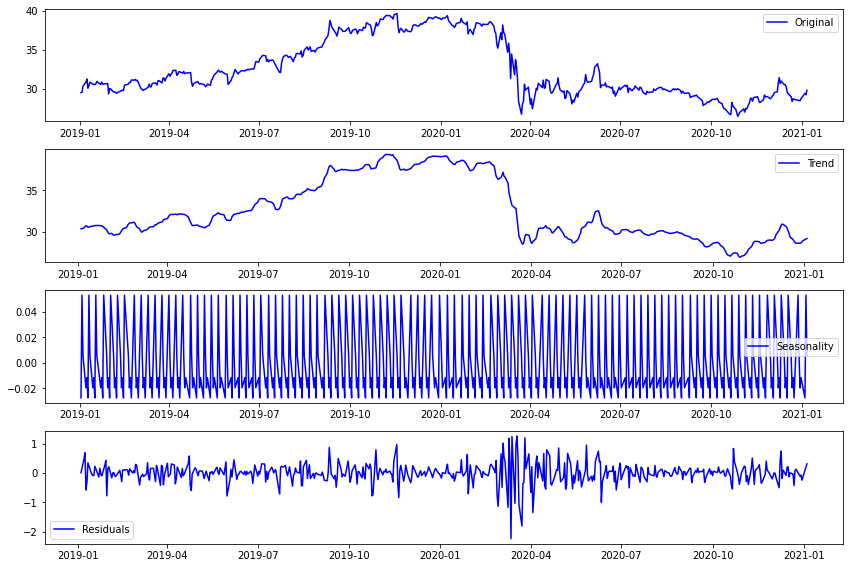

In [25]:
import matplotlib.pyplot as plt
# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(dataT['close'], label='Original', color="blue")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(result.trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(result.seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(result.resid, label='Residuals', color="blue")
plt.legend(loc='best')
plt.tight_layout()

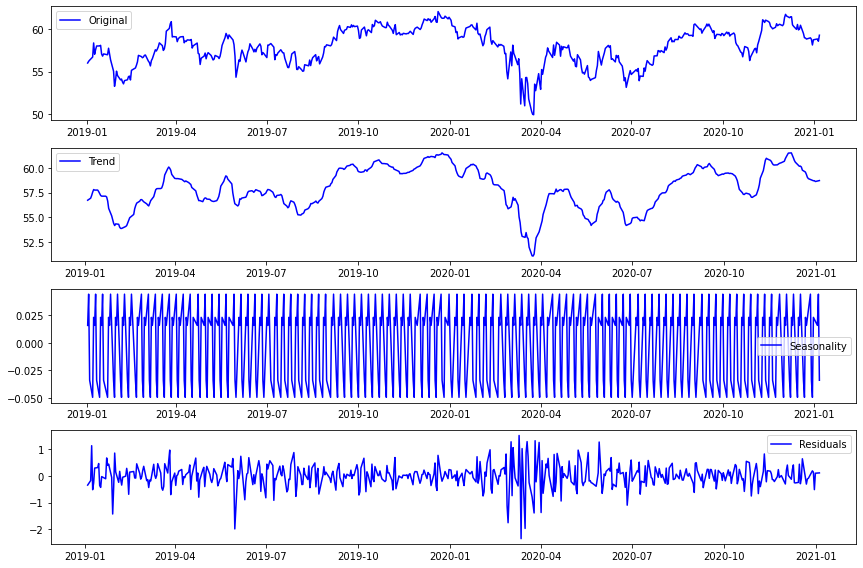

In [26]:
# verizon
resultV = seasonal_decompose(dataVZ["close"], model='additive', period=5)
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(dataVZ['close'], label='Original', color="blue")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(resultV.trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(resultV.seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(resultV.resid, label='Residuals', color="blue")
plt.legend(loc='best')
plt.tight_layout()

## Conclusion
- The raw plots do not indicate an obvious repeating pattern.
- Using seasonal decompose, this does show a repeating trend which has set frequency, although there is some noice around this.
- 